In [1]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/data.csv")


In [ ]:
#Displaying the first 5 rows
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


Data Preprocessing/Cleaning
1. Bad data handling
2. Empty values
3. Wrong formats
4. wrong data
5. Duplicates


Working with empty values

In [3]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


Checking wrong formats

In [6]:
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [8]:
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric calues found in column: {col}")

Non-numeric calues found in column: Calories


Wrong data

In [10]:
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df[col]<0).any():
        print(f"Negative values found in column: {col}")
    else:
        print(f"All values in column {col} are non-negative.")

All values in column Duration are non-negative.
All values in column Pulse are non-negative.
All values in column Maxpulse are non-negative.
All values in column Calories are non-negative.


Duplicates

In [11]:
#Removing duplicates
df.drop_duplicates(inplace=True)
#Checking for duplicates
if df.duplicated().any():
    print("Duplicates found in the dataset.")
else:
    print("No duplicates found in the dataset.")
#Saving the cleaned dataset
df.to_csv("datasets/cleaned_data.csv", index=False)
# Displaying the cleaned dataset
print("Cleaned dataset:")
print(df.head())

No duplicates found in the dataset.
Cleaned dataset:
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


Recommendations for data cleaning
1.  Ensure all columns have the correct data types.
2.  Handle missing values appropriately, either by filling them or removing rows/columns.
3.  Check for and handle outliers in numerical columns.
4.  Remove or handle duplicate rows to maintain data integrity.
5.  Validate that all categorical columns have consistent values.
6.  Normalize or standardize numerical columns if necessary for analysis.
7.  Document any changes made to the dataset for future reference.
8.  Consider encoding categorical variables if they will be used in machine learning models.
9.  Review the dataset for any inconsistencies or anomalies that may affect analysis.

In [12]:
#Fill empty cells with the mean of the column
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipykernel_23845/3178691126.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [13]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,379.414650
std,43.151882,14.711588,16.471618,267.095804
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,324.100000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


In [17]:
print(f"The shape of the dataset is {df.shape}")

The shape of the dataset is (162, 4)


Data Visualisation

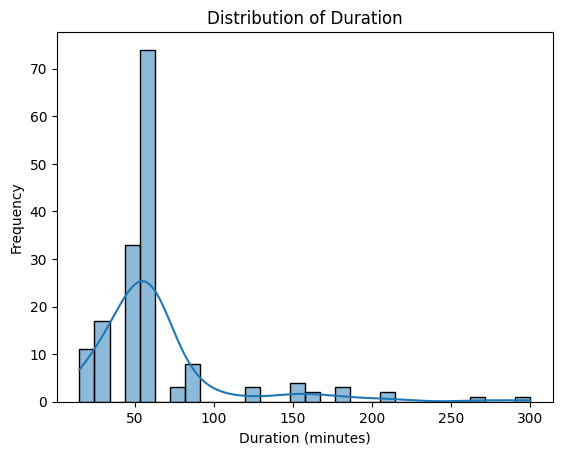

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
#Histogtram of "Duration"
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


Exercise: Plot for Maxpulse and Calories for histogram

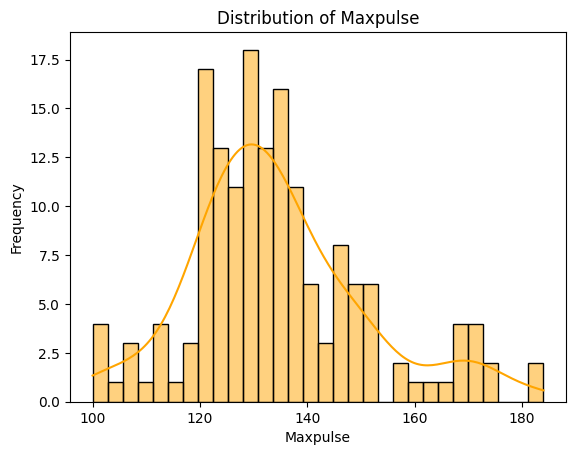

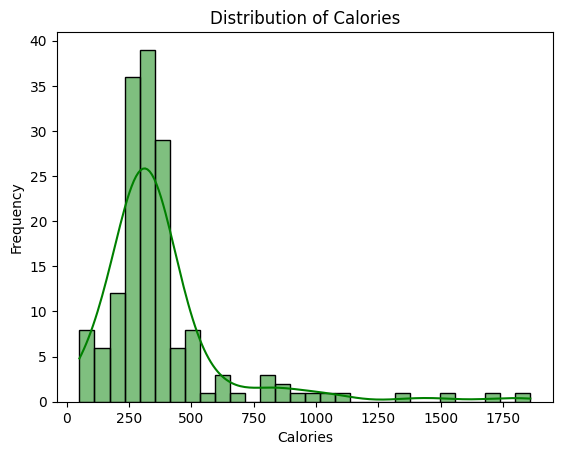

In [21]:
#Plot for Maxpulse and Calories for histogram
sns.histplot(df['Maxpulse'], bins=30, kde=True, color='orange')
plt.title('Distribution of Maxpulse')
plt.xlabel('Maxpulse')
plt.ylabel('Frequency')
plt.show()
#Plot for Calories
sns.histplot(df['Calories'], bins=30, kde=True, color='green')              
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

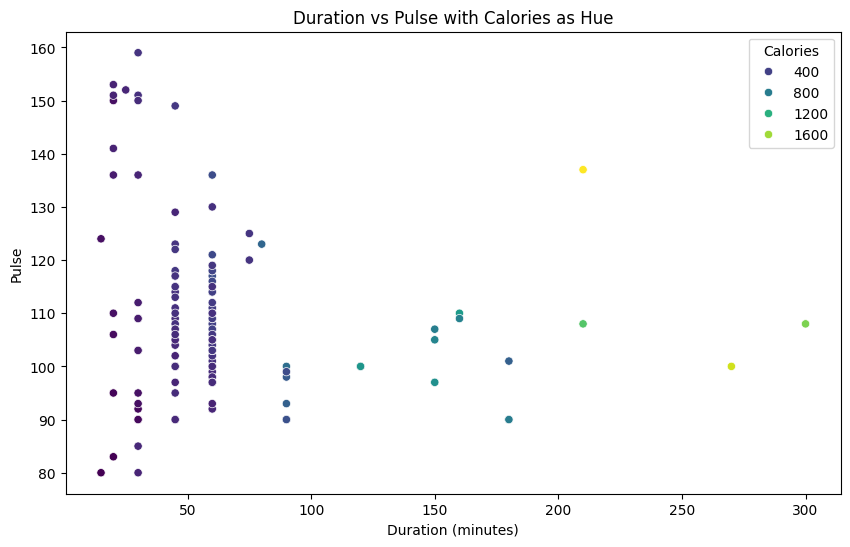

In [23]:
#Plot for Duration vs Pulse
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='Pulse', hue='Calories', palette='viridis')            
plt.title('Duration vs Pulse with Calories as Hue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Pulse')
plt.legend(title='Calories')
plt.show()

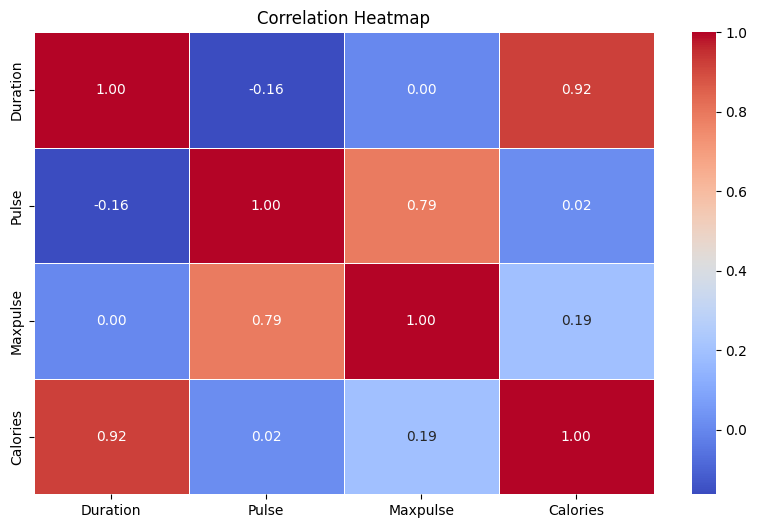

In [25]:
#Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()